# Análise Exploratória dos dados

## Importação dos pacotes

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, f_classif

import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## Importação das funções locais

In [3]:
import os
os.chdir("../functions")
from feature import features_equal_mean, features_high_corr, features_chi2, binary_features, features_equal_var_mean
from my_plot import labs
os.chdir("../notebooks")

In [4]:
help(binary_features)

Help on function binary_features in module feature:

binary_features(data)



## Leitura dos dados Pré-processados

In [5]:
data = pd.read_csv('../data/preprocessed_data/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

## Primeiras Impressões

In [6]:
data.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Columns: 229 entries, AGE_ABOVE65 to ICU
dtypes: float64(225), int64(3), object(1)
memory usage: 526.1+ KB


In [8]:
data.describe()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.411565,0.384354,0.095238,0.023810,0.085034,0.020408,0.115646,0.047619,0.170068,0.163265,...,-0.970588,-0.968902,-0.985226,-0.968574,-0.967168,-0.979110,-0.971495,-0.969322,-0.985233,0.357143
std,0.492956,0.487272,0.294044,0.152715,0.279408,0.141633,0.320346,0.213322,0.376333,0.370238,...,0.090889,0.085524,0.033585,0.086117,0.087508,0.056166,0.079718,0.083745,0.034103,0.479974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.058824,-0.238095,-0.757576,-0.217391,-0.351328,-0.535878,-0.451613,-0.285468,-0.732438,1.000000


In [9]:
data.iloc[:, ~data.columns.isin(data.describe().columns)]

,AGE_PERCENTIL
0,60th
1,10th
2,40th
3,10th
4,10th
...,...
289,40th
290,Above 90th
291,50th
292,40th


## Análise variáveis categóricas

In [10]:
percentil_prop = data.groupby('AGE_PERCENTIL')['ICU'].value_counts(normalize=True).reset_index(name='Prop')

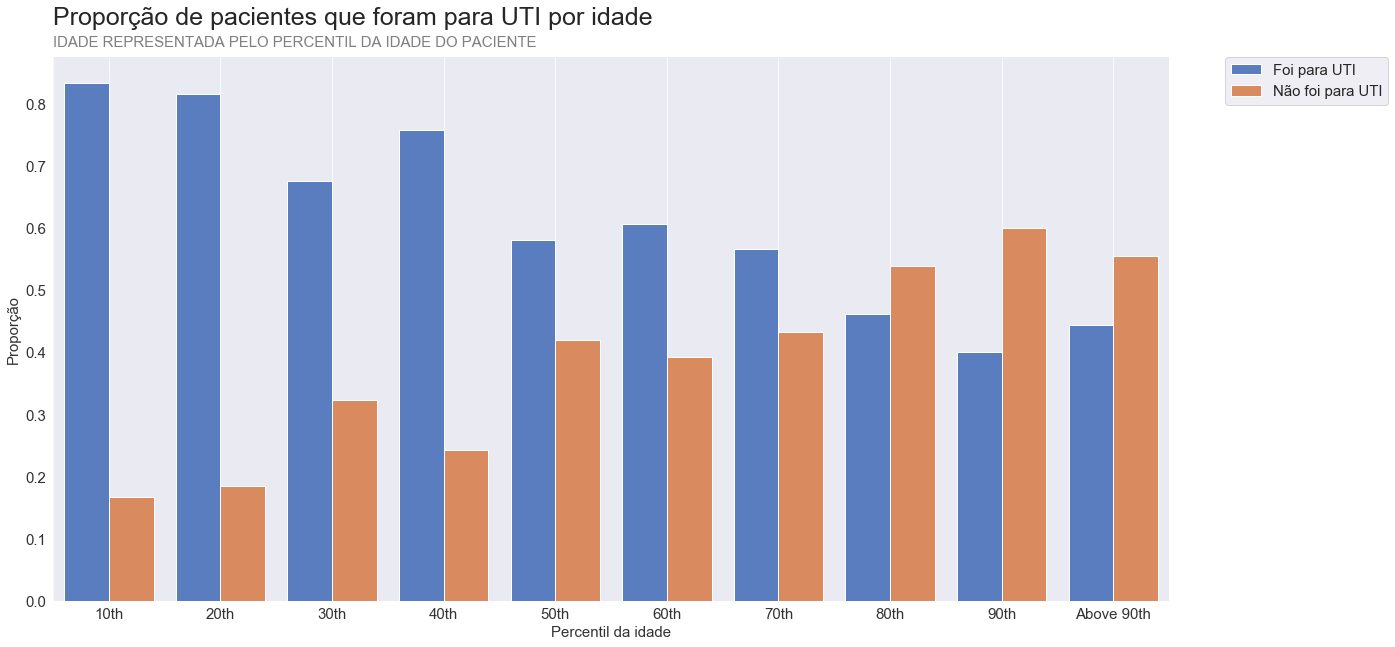

In [11]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=percentil_prop, y='Prop', x='AGE_PERCENTIL', hue='ICU', ax=ax, palette='muted')
labs(title='Proporção de pacientes que foram para UTI por idade', subtitle='IDADE REPRESENTADA PELO PERCENTIL DA IDADE DO PACIENTE',
     xlabel='Percentil da idade', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Foi para UTI', 'Não foi para UTI'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

## Análise das features binárias

In [12]:
binary_cat = pd.melt(data[binary_features(data)], id_vars='ICU')
binary_prop = binary_cat.groupby(['variable','value'])['ICU'].mean().reset_index(name='Prop')

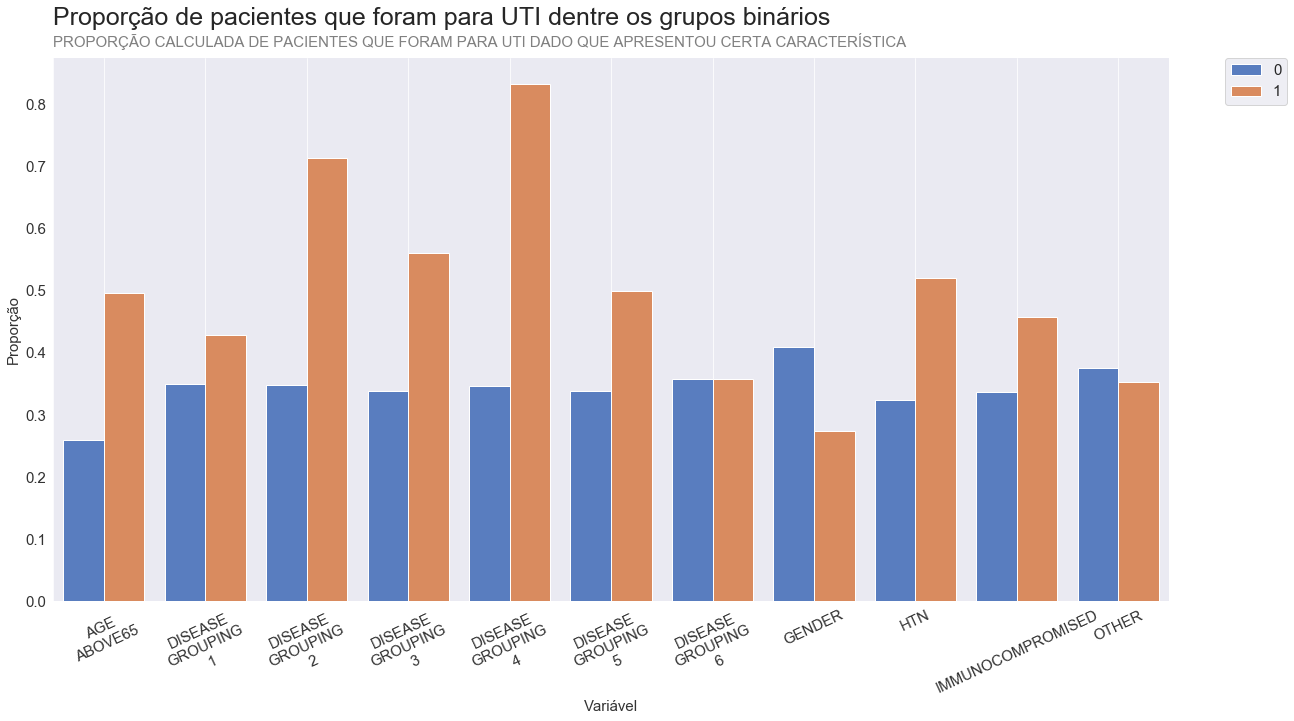

In [13]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=binary_prop, y='Prop', x='variable', hue='value', ax=ax, palette='muted')
labs(title='Proporção de pacientes que foram para UTI dentre os grupos binários', 
     subtitle='PROPORÇÃO CALCULADA DE PACIENTES QUE FORAM PARA UTI DADO QUE APRESENTOU CERTA CARACTERÍSTICA',
     xlabel='Variável', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['0','1'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xticks(range(11),labels=binary_prop['variable'].str.split(r'_| ').str.join('\n').unique(),rotation=25)
plt.show()

## Análise de correção entre as variáveis

In [14]:
cor = data.corr().abs()
cor_melt = pd.melt(cor.reset_index(), id_vars='index')
cor_melt_top = cor_melt.query('value < 1 and value > 0.75')
cor_top = cor.loc[cor_melt_top['index'].unique(), cor_melt_top['variable'].unique()] 

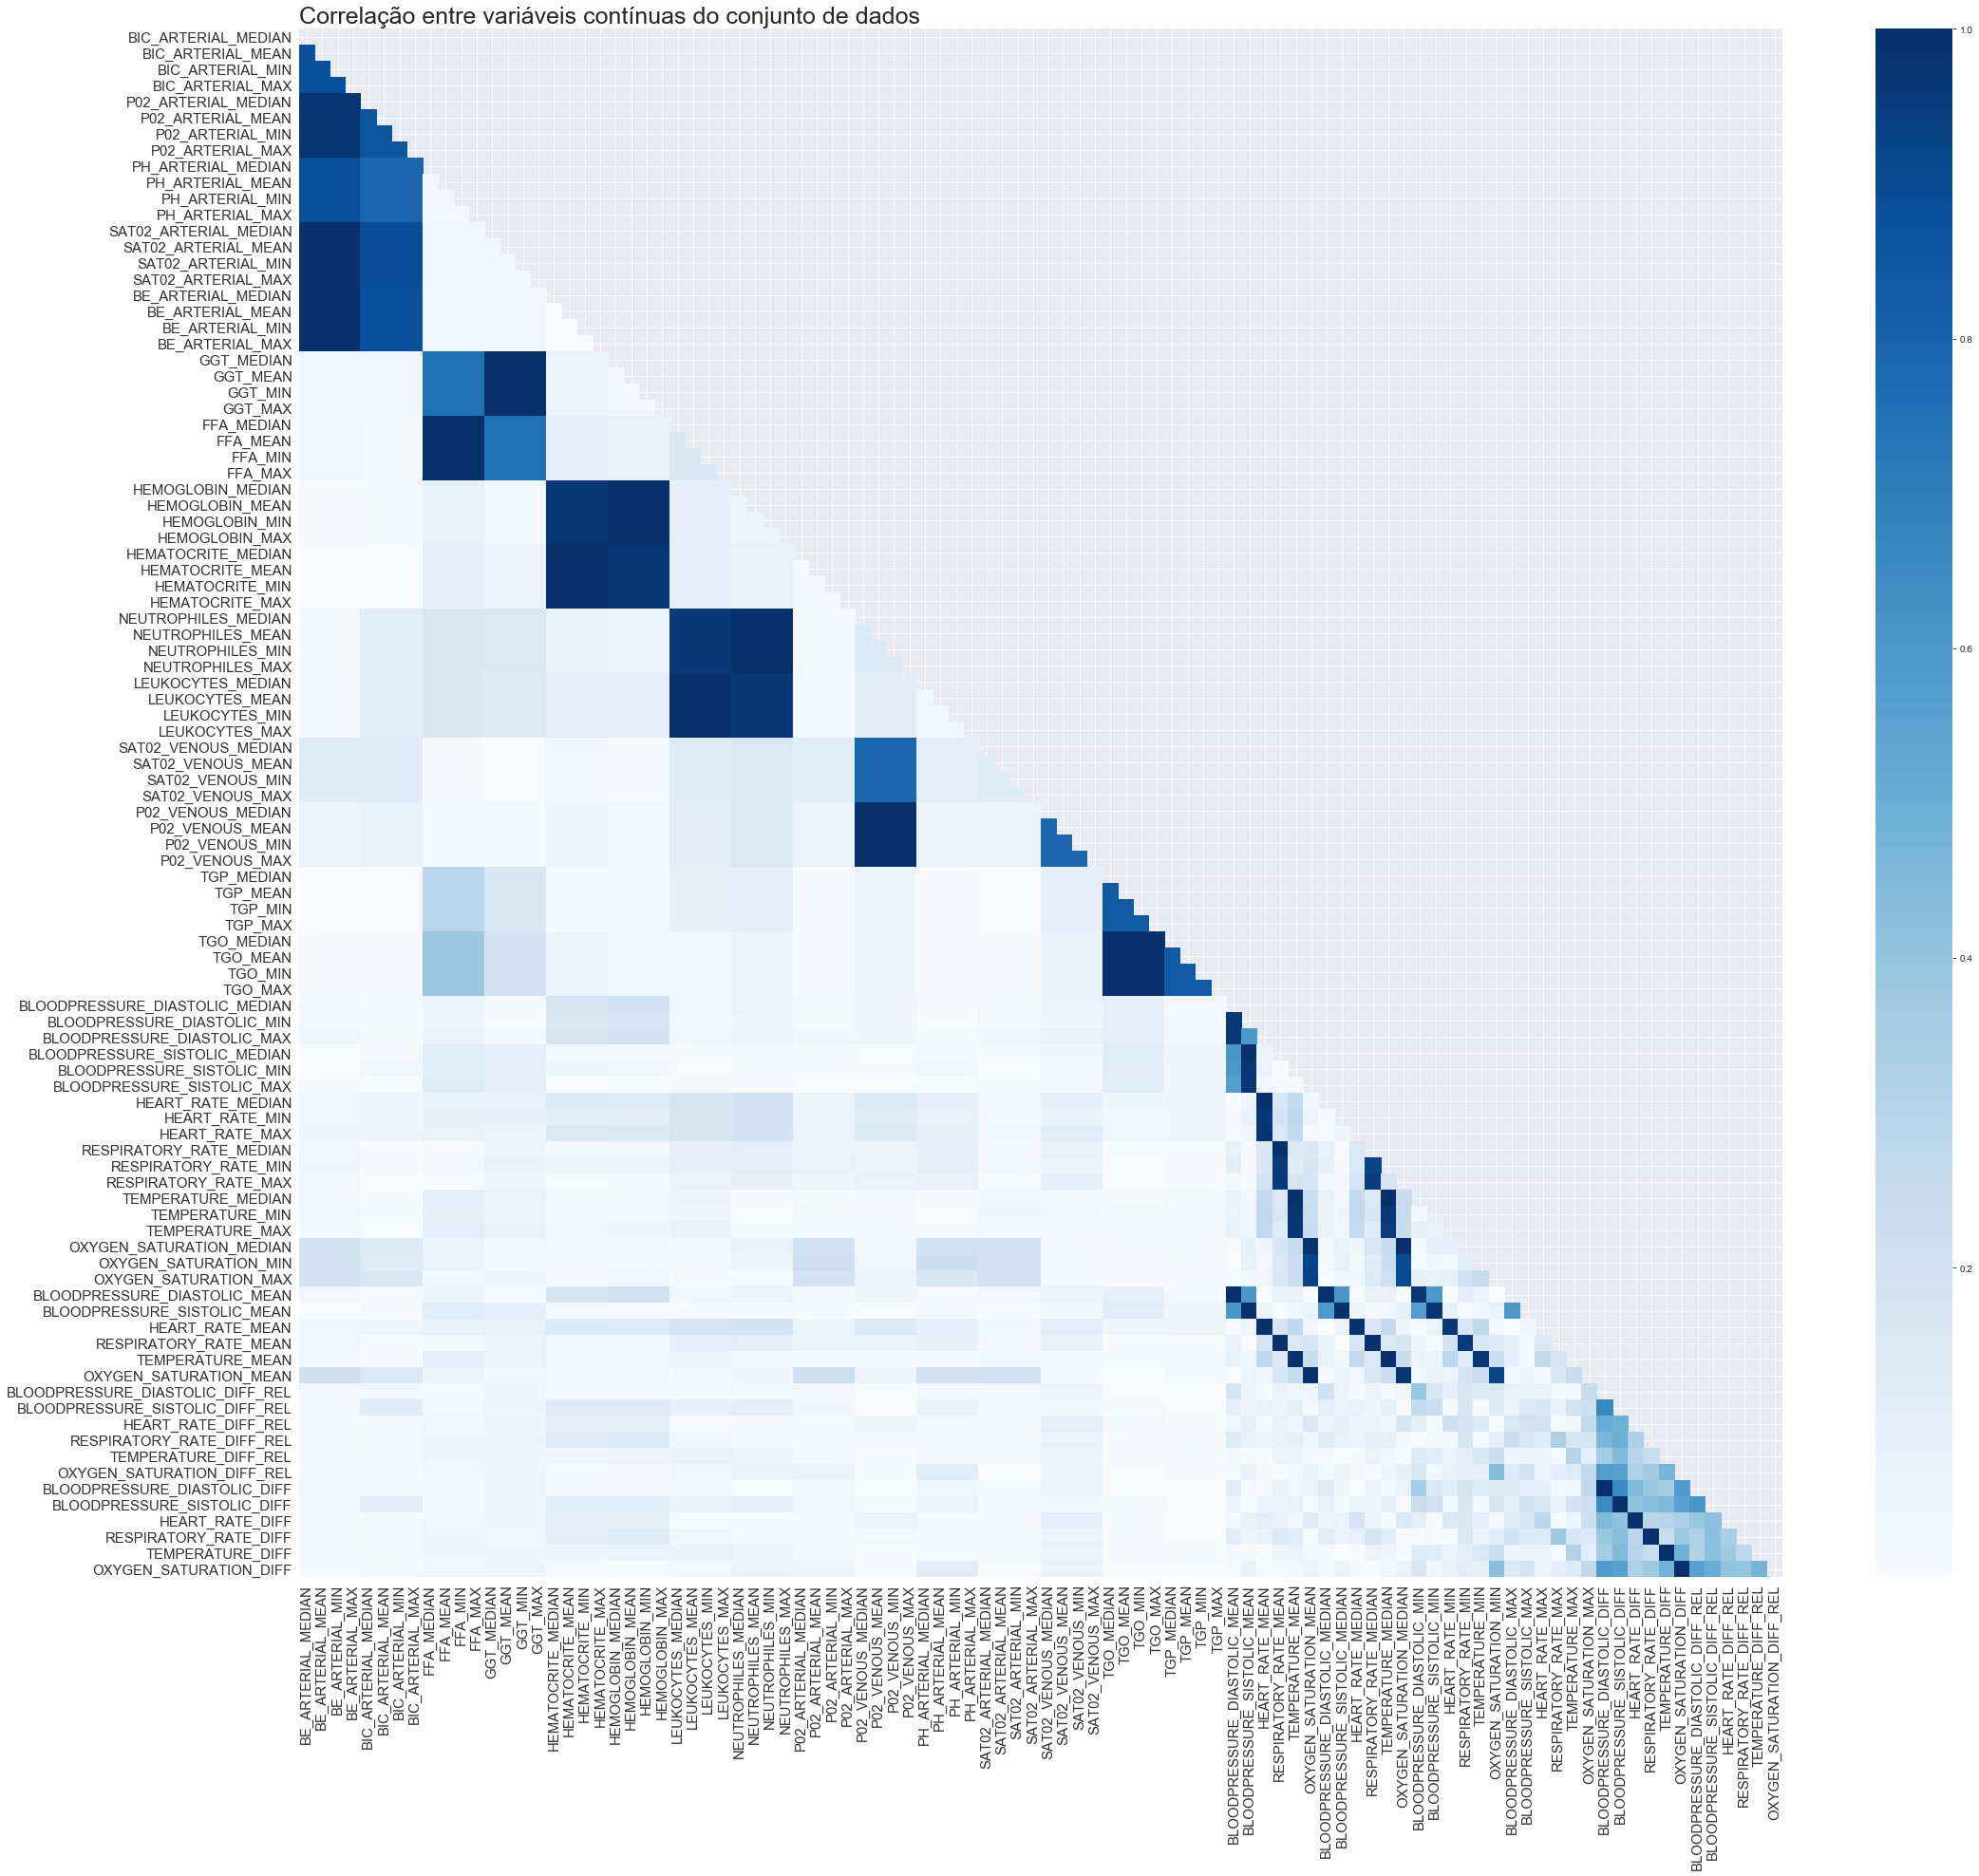

In [15]:
fig,ax = plt.subplots(figsize=(35, 30))
mask = np.triu(np.ones_like(cor_top, dtype=bool))
sns.heatmap(cor_top,
            cmap='Blues',
            mask=mask,
            ax=ax)
labs(title='Correlação entre variáveis contínuas do conjunto de dados', ax=ax)
plt.show()

In [16]:
cols_high_corr = features_high_corr(data, 0.95)

## Análise da Variância das features

In [17]:
cont = data.drop(cols_high_corr, axis=1).drop(binary_features(data), axis=1).select_dtypes('float64')
np.random.seed()
sample = cont.iloc[:,np.random.randint(0,len(cont.columns), size=15)]
sample_cont = pd.concat([sample,data['ICU']],axis=1) 
cont_melt = pd.melt(sample_cont, id_vars='ICU')

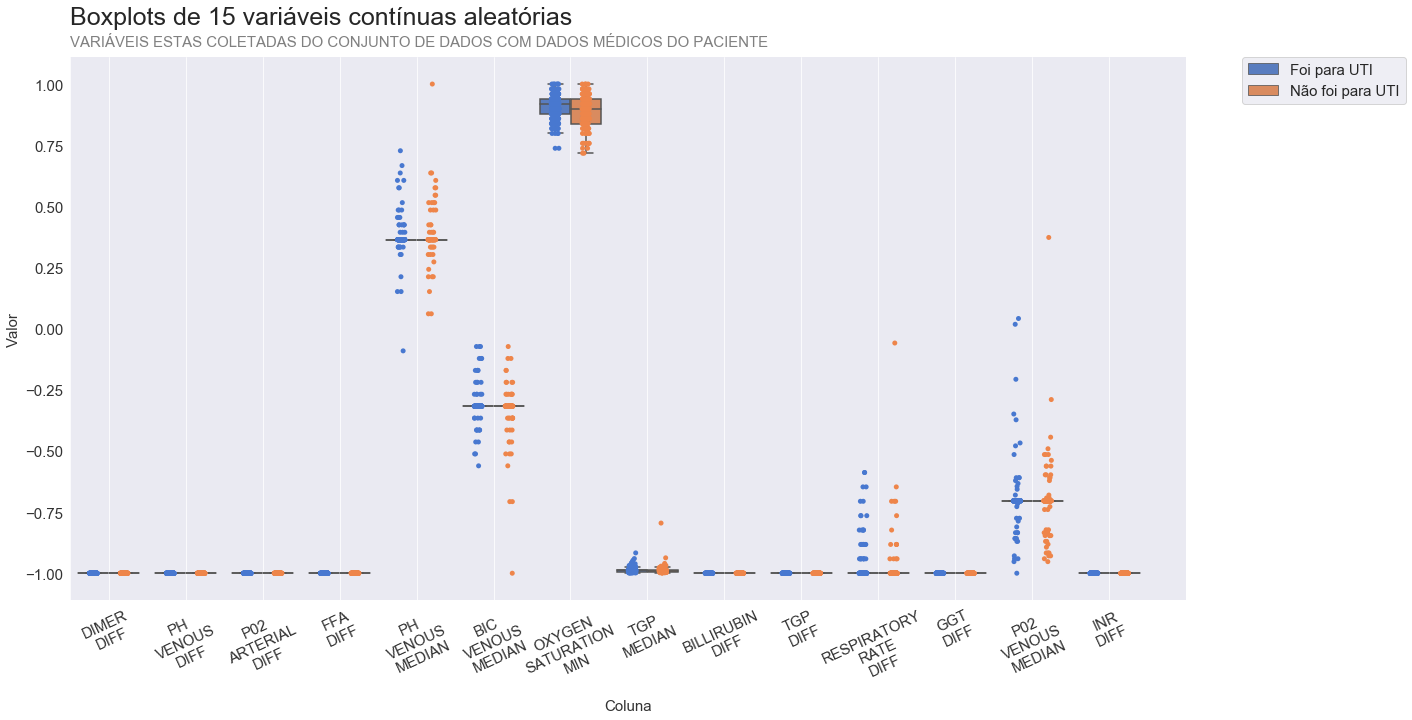

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='variable', y='value', hue='ICU',
            data=cont_melt, palette="muted", 
            ax=ax, showfliers=False)
sns.stripplot(x='variable', y='value', hue='ICU',
              data=cont_melt, palette="muted",
              ax=ax, dodge=True)
labs(title='Boxplots de 15 variáveis contínuas aleatórias', 
     xlabel='Coluna', 
     ylabel='Valor', 
     subtitle='VARIÁVEIS ESTAS COLETADAS DO CONJUNTO DE DADOS COM DADOS MÉDICOS DO PACIENTE', ax=ax)
plt.xticks(range(15),labels=cont_melt['variable'].str.split('_').str.join('\n').unique(),rotation=25)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Foi para UTI', 'Não foi para UTI'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

In [19]:
var = cont.var()
var = var.sort_values()
var.head()

PC02_ARTERIAL_DIFF    0.0
PH_ARTERIAL_DIFF      0.0
HEMATOCRITE_DIFF      0.0
HEMOGLOBIN_DIFF       0.0
INR_DIFF              0.0
dtype: float64

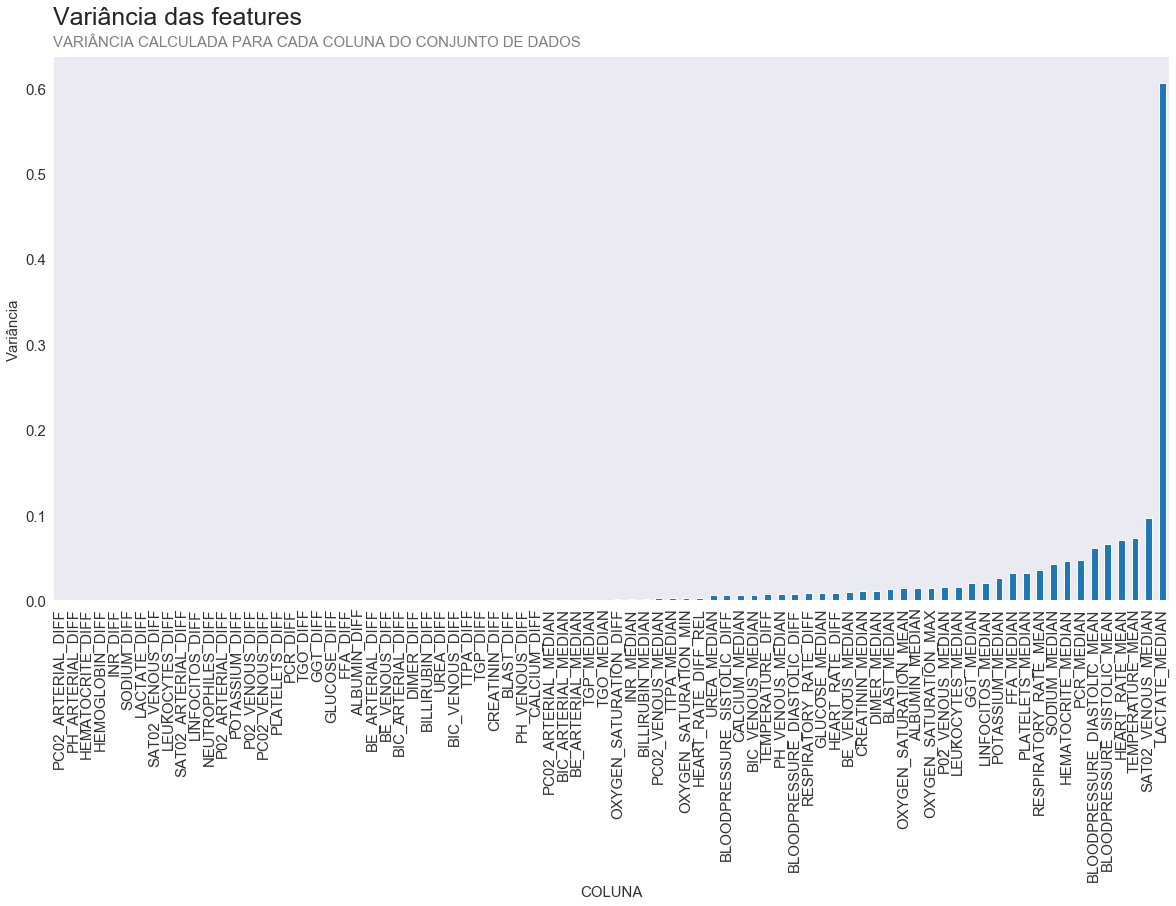

In [20]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
var.plot(kind='bar')
labs(ax, title='Variância das features', subtitle='VARIÂNCIA CALCULADA PARA CADA COLUNA DO CONJUNTO DE DADOS', xlabel='COLUNA', ylabel='Variância')
plt.show()